# Lab 3: Convolutional Neural Nets (CNNs)

## Example: CNN Implementation

In [37]:
import torch
import torch.nn as nn
from collections import OrderedDict
import torch.optim as optim
from torchvision.datasets.mnist import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision
from math import floor, ceil
import numpy as np
import matplotlib.pyplot as plt

In [1]:
#Formatting on training set
train_x = X_train.reshape(33600, 1, 28, 28)
train_x  = torch.from_numpy(train_x).float()
# converting the target into torch format
y_train = torch.from_numpy(np.array(y_train))
# shape of training data
train_x.shape, y_train.shape

#Formatting on testing set
X_cv = X_cv.reshape(8400, 1, 28, 28)
X_cv  = torch.from_numpy(np.array(X_cv)).float()
# converting the target into torch format
y_cv = torch.from_numpy(np.array(y_cv))
X_cv.shape, y_cv.shape

NameError: name 'X_train' is not defined

In [ ]:
# batch_size, epoch and iteration
batch_size = 100


# Pytorch train and test sets
train = torch.utils.data.TensorDataset(train_x,y_train)
test = torch.utils.data.TensorDataset(X_cv,y_cv)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size,
                                           shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, 
                                          shuffle = False)

In [4]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, 
                              kernel_size=3, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, 
                              kernel_size=3, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 5 * 5, 10) 
    
    def forward(self, x):
        # Input x dimensions:   #nx1x28x28
        # Set 1
        out = self.cnn1(x)      #nx16x26x26
        out = self.relu1(out) 
        out = self.maxpool1(out)#nx16x13x13
        
        # Set 2
        out = self.cnn2(out)    #nx32x11x11
        out = self.relu2(out)   
        out = self.maxpool2(out)#nx32x5x5
        
        #Flatten
        out = out.view(out.size(0), -1) #nx800

        #Dense
        out = self.fc1(out)     #nx10
        
        return out

In [ ]:
#Definition of hyperparameters
n_iters = 2500
num_epochs = n_iters / (len(train_x) / batch_size)
num_epochs = int(num_epochs)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
model = CNNModel()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        # Clear gradients
        optimizer.zero_grad()
        # Forward propagation
        outputs = model(train)
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        # Calculating gradients
        loss.backward()
        # Update parameters
        optimizer.step()

        count += 1
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                # Forward propagation
                outputs = model(test)
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))


In [ ]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

## Assignment: LeNet5 Implementation

In [33]:
class C1(nn.Module):
    def __init__(self):
        super(C1, self).__init__()
        
        self.c1 = nn.Sequential(OrderedDict([
            ('c1', nn.Conv2d(1, 6, kernel_size=(5,5))),
            ('tanh1', nn.Tanh()),
            ('s1', nn.MaxPool2d(kernel_size=(2,2), stride=2))
        ]))
        
    def forward(self, x):
        output = self.c1(x)
        return output

    
class C2(nn.Module):
    def __init__(self):
        super(C2, self).__init__()

        self.c2 = nn.Sequential(OrderedDict([
            ('c2', nn.Conv2d(6, 16, kernel_size=(5, 5))),
            ('tanh2', nn.Tanh()),
            ('s2', nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        ]))

    def forward(self, x):
        output = self.c2(x)
        return output


class C3(nn.Module):
    def __init__(self):
        super(C3, self).__init__()

        self.c3 = nn.Sequential(OrderedDict([
            ('c3', nn.Conv2d(16, 120, kernel_size=(5, 5))),
            ('tanh3', nn.Tanh())
        ]))

    def forward(self, x):
        output = self.c3(x)
        return output
    

class F4(nn.Module):
    def __init__(self):
        super(F4, self).__init__()

        self.f4 = nn.Sequential(OrderedDict([
            ('f4', nn.Linear(120, 84)),
            ('tanh4', nn.Tanh())
        ]))

    def forward(self, x):
        output = self.f4(x)
        return output


class F5(nn.Module):
    def __init__(self):
        super(F5, self).__init__()

        self.f5 = nn.Sequential(OrderedDict([
            ('f5', nn.Linear(84, 10)),
            ('sig5', nn.LogSoftmax(dim=-1))
        ]))

    def forward(self, x):
        output = self.f5(x)
        return output


class LeNet5(nn.Module):

    def __init__(self):
        super(LeNet5, self).__init__()
        
        #define LeNet5
        self.c1 = C1()
        self.c2_1 = C2() 
        self.c2_2 = C2() 
        self.c3 = C3() 
        self.f4 = F4() 
        self.f5 = F5() 

    def forward(self, x):
        #Define forward pass
        #can also return probabilities
        #by performing softmax
        output = self.c1(x)

        t = self.c2_1(output)
        output = self.c2_2(output)

        output += t

        output = self.c3(output)
        output = output.view(x.size(0), -1)
        output = self.f4(output)
        output = self.f5(output)
        return output

In [25]:
data_train = MNIST('./data/mnist',
                   download=True,
                   transform=transforms.Compose([
                       transforms.Resize((32, 32)),
                       transforms.ToTensor()]))
data_test = MNIST('./data/mnist',
                  train=False,
                  download=True,
                  transform=transforms.Compose([
                      transforms.Resize((32, 32)),
                      transforms.ToTensor()]))
data_train_loader = DataLoader(data_train, batch_size=256, shuffle=True, num_workers=8)
data_test_loader = DataLoader(data_test, batch_size=1024, num_workers=8)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw

Processing...
Done!


/opt/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [40]:

model = LeNet5()
optimizer = optim.Adam(model.parameters(), lr=0.002)
criterion = nn.CrossEntropyLoss()

epochs = 10

loss_list     = np.zeros((epochs,))
accuracy_list = np.zeros((epochs,))

for epoch in range(epochs):
    print(epoch)
    for i, (train_sample, train_target) in enumerate(data_train_loader):
        #Calculate training loss on model
        
#         train_sample=train_sample.view(train_sample.size(0),28*28)
        y_pred = model(train_sample)
        loss = criterion(y_pred, train_target)  # ?
        loss_list[epoch] = loss.item()

        # Zero gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    



0
1
2
3
4
5
6
7
8
9


In [41]:
#Calculate loss on test set
test_loss_list     = np.zeros((epochs,))
test_accuracy_list = np.zeros((epochs,))

for epoch in range(epochs):
    for i, (test_sample, test_target) in enumerate(data_test_loader):
#         test_sample=test_sample.view(test_sample.size(0),28*28)
        with torch.no_grad():
            y_pred = model(test_sample)
            correct = (torch.argmax(y_pred, dim=1) == test_target).type(torch.FloatTensor)
            test_accuracy_list[epoch] = correct.mean()

0.9910714030265808

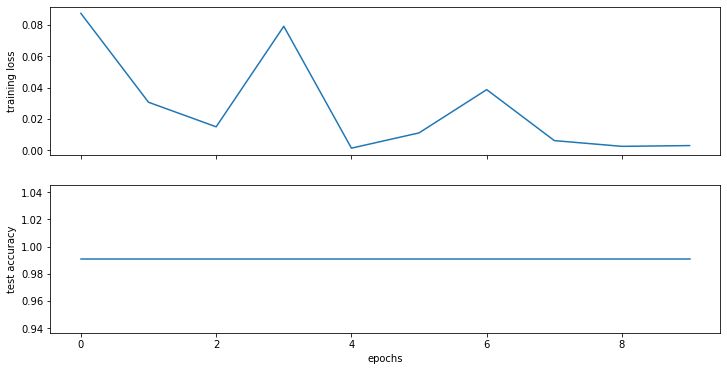

In [43]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(loss_list)
ax1.set_ylabel("training loss")
ax2.plot(test_accuracy_list)
ax2.set_ylabel("test accuracy")
ax2.set_xlabel("epochs");

# accuracy_list[49]
test_accuracy_list[0]